In [48]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [39]:
# Normalización de datos
data_entrenamiento = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
data_validacion = ImageDataGenerator(rescale=1./255)

# Directorios relativos
carpeta_entrenamiento = os.path.join('..','..','data', 'entrenamiento')
carpeta_validacion = os.path.join('..','..','data', 'validacion')

# Clasificación de las imágenes en 4 categorías
data_entrenamiento = data_entrenamiento.flow_from_directory(
    carpeta_entrenamiento,
    target_size=(128,128), # Tamaño de las imágenes
    batch_size=64, # Tamaño del lote de procesamiento
    class_mode='categorical' # Clasificación binaria porque solo hay dos clases
)

data_validacion = data_validacion.flow_from_directory(
    carpeta_validacion,
    target_size=(128,128), # Tamaño de las imágenes
    batch_size=64, # Tamaño del lote de procesamiento
    class_mode='categorical' # Clasificación categórica para 4 clases
)

Found 36000 images belonging to 4 classes.
Found 4000 images belonging to 4 classes.


In [40]:
# Identificación de las clases
print(data_entrenamiento.class_indices)

{'metal': 0, 'papel_y_carton': 1, 'plastico': 2, 'vidrio': 3}


## Entrenamiento de Modelo 1

### Arquitectura de 12 capas
- Capa 1: Capa de entrada
- Capa 2: Capa de convolución de 32 filtros
- Capa 3: Capa de convolución de 64 filtros
- Capa 4:  Capa de convolución de 128 filtros
- Capa 5: Capa de convolución de 256 filtros
- Capa 6: Capa de convolución de 512 filtros
- Capa 7: Capa de convolución de 1024 filtros
- Capa 8: Capa de regularización 1
- Capa 9: Capa densa 1
- Capa 10: Capa de regularización 1
- Capa 11: Capa densa 1
- Capa 12: Capa de salida

In [41]:
# Definición del modelo de red neuronal convolucional CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)), # Capa de entrada con imágenes de 128x128 píxeles y 3 canales de color
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'), # Capa de convolución con 32 filtros de 3x3
    tf.keras.layers.BatchNormalization(), # Capa de normalización de la red neuronal
    tf.keras.layers.MaxPooling2D((2, 2)), # Reducción de las características detectadas (reducción de la dimensionalidad)
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'), # Capa de convolución con 64 filtros de 3x3
    tf.keras.layers.BatchNormalization(), # Capa de normalización de la red neuronal
    tf.keras.layers.MaxPooling2D((2, 2)), # Reducción de las características detectadas (reducción de la dimensionalidad)
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'), # Capa de convolución con 128 filtros de 3x3
    tf.keras.layers.BatchNormalization(), # Capa de normalización de la red neuronal
    tf.keras.layers.MaxPooling2D((2, 2)), # Reducción de las características detectadas (reducción de la dimensionalidad)
    
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'), # Capa de convolución con 128 filtros de 3x3
    tf.keras.layers.BatchNormalization(), # Capa de normalización de la red neuronal
    tf.keras.layers.MaxPooling2D((2, 2)), # Reducción de las características detectadas (reducción de la dimensionalidad)
    
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'), # Capa de convolución con 128 filtros de 3x3
    tf.keras.layers.BatchNormalization(), # Capa de normalización de la red neuronal
    tf.keras.layers.MaxPooling2D((2, 2)), # Reducción de las características detectadas (reducción de la dimensionalidad)
    
    tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', padding='same'), # Capa de convolución con 128 filtros de 3x3
    tf.keras.layers.BatchNormalization(), # Capa de normalización de la red neuronal
    tf.keras.layers.MaxPooling2D((2, 2)), # Reducción de las características detectadas (reducción de la dimensionalidad)
    
    tf.keras.layers.Flatten(), # Aplanamiento de las características detectadas en un vector unidimensional
    tf.keras.layers.Dropout(0.5), # Capa de regularización de la red neuronal
    tf.keras.layers.Dense(512, activation='relu'), # Capa densa con 512 neuronas
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax') # Capa densa con 1 neurona y función de activación sigmoide
])

In [42]:
# Compilación del modelo CNN
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # Algoritmo de optimización Adam: adaptativo y eficiente
    loss='categorical_crossentropy', # Función de pérdida para clasificación binaria (entropía cruzada)
    metrics=['accuracy']) # Métrica de evaluación de la precisión

In [43]:
# Cálculo de pasos
pasos_entrenamiento = data_entrenamiento.samples // data_entrenamiento.batch_size
pasos_validacion = data_validacion.samples // data_validacion.batch_size

In [45]:
# Callbacks para mejorar el entrenamiento
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=5, 
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.2, 
        patience=3, 
        min_lr=0.00001
    )
]

In [46]:
# Entrenamiento del modelo
history = model.fit(
    data_entrenamiento, # Generador de datos de entrenamiento
    steps_per_epoch=pasos_entrenamiento, # Número de pasos por época
    epochs=20, # Número de épocas
    validation_data=data_validacion, # Generador de datos de validación
    validation_steps=pasos_validacion, # Número de pasos de validación
    callbacks=callbacks
) # Número de pasos de validación

c:\Users\carolina\Documents\Proyectos_programacion\SIRA\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 1486s 3s/step - accuracy: 0.3841 - loss: 1.9468 - val_accuracy: 0.4856 - val_loss: 1.1652 - learning_rate: 1.0000e-04
Epoch 2/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 222us/step - accuracy: 0.4688 - loss: 1.2684 - val_accuracy: 0.4375 - val_loss: 1.1682 - learning_rate: 1.0000e-04
Epoch 3/20


C:\Users\carolina\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


562/562 ━━━━━━━━━━━━━━━━━━━━ 732s 1s/step - accuracy: 0.4989 - loss: 1.1531 - val_accuracy: 0.5277 - val_loss: 1.0902 - learning_rate: 1.0000e-04
Epoch 4/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 3s 704us/step - accuracy: 0.5312 - loss: 1.0814 - val_accuracy: 0.6250 - val_loss: 0.9784 - learning_rate: 1.0000e-04
Epoch 5/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 1595s 3s/step - accuracy: 0.5487 - loss: 1.0616 - val_accuracy: 0.5411 - val_loss: 1.0859 - learning_rate: 1.0000e-04
Epoch 6/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 3s 685us/step - accuracy: 0.5781 - loss: 1.0319 - val_accuracy: 0.5312 - val_loss: 1.0729 - learning_rate: 1.0000e-04
Epoch 7/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 704s 1s/step - accuracy: 0.5990 - loss: 0.9664 - val_accuracy: 0.4796 - val_loss: 1.1816 - learning_rate: 1.0000e-04
Epoch 8/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 138us/step - accuracy: 0.6875 - loss: 0.7854 - val_accuracy: 0.5000 - val_loss: 1.1192 - learning_rate: 2.0000e-05
Epoch 9/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 384s 683ms/step - accurac

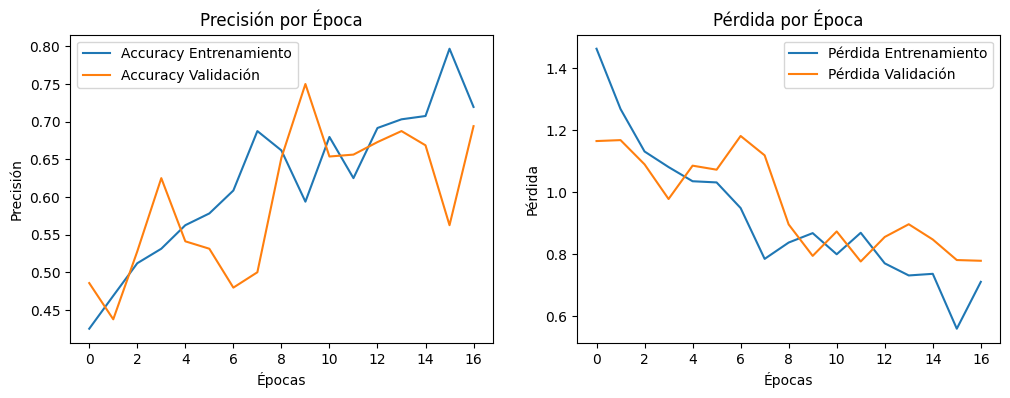

In [49]:
# Graficar precisión
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy Validación')
plt.title('Precisión por Época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida por Época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [50]:
# Mostrar la mejor precisión y pérdida de entrenamiento y validación obtenidas en una época
print('Numero de la mejor epoca de entrenamiento: ', history.history['accuracy'].index(max(history.history['accuracy']))+1)
print('Numero de la mejor epoca de validación: ', history.history['val_accuracy'].index(max(history.history['val_accuracy']))+1)
print('Precisión de entrenamiento: ', max(history.history['accuracy']))
print('Precisión de validación: ', max(history.history['val_accuracy']))
print('Pérdida de entrenamiento: ', min(history.history['loss']))
print('Pérdida de validación: ', min(history.history['val_loss']))

Numero de la mejor epoca de entrenamiento:  16
Numero de la mejor epoca de validación:  10
Precisión de entrenamiento:  0.796875
Precisión de validación:  0.75
Pérdida de entrenamiento:  0.5604029893875122
Pérdida de validación:  0.7770706415176392


In [51]:
# Precisión y pérdida en la última época
print('Numero de la ultima epoca: ', len(history.history['accuracy']))
print('Precisión en la última época de entrenamiento: ', history.history['accuracy'][-1])
print('Precisión en la última época de validación: ', history.history['val_accuracy'][-1])
print('Pérdida en la última época de entrenamiento: ', history.history['loss'][-1])
print('Pérdida en la última época de validación: ', history.history['val_loss'][-1])

Numero de la ultima epoca:  17
Precisión en la última época de entrenamiento:  0.7195291519165039
Precisión en la última época de validación:  0.6940523982048035
Pérdida en la última época de entrenamiento:  0.7114879488945007
Pérdida en la última época de validación:  0.7793642282485962


### Resultado
El modelo a pesar de que alcanzó un 79.7% de precisión aproximadamente en su mejor época (16), tiene una alta tasa de pérdida: 56% aproximadamente; por tanto, no es óptimo y se optará por entrenar uno nuevo.